<a href="https://colab.research.google.com/github/zahra-0201/Machine-Learning/blob/main/tugas11_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=19q7DWhmQFZlCPrrWBaR_07RMT_SXctxW")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92887 entries, 0 to 92886
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tgl      92887 non-null  object 
 1   ot       92887 non-null  object 
 2   lat      92887 non-null  float64
 3   lon      92887 non-null  float64
 4   depth    92887 non-null  int64  
 5   mag      92887 non-null  float64
 6   remark   92887 non-null  object 
 7   strike1  2735 non-null   float64
 8   dip1     2735 non-null   float64
 9   rake1    2735 non-null   float64
 10  strike2  2735 non-null   float64
 11  dip2     2735 non-null   float64
 12  rake2    2735 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 9.2+ MB


In [4]:
df.shape

(92887, 13)

In [5]:
df.describe()

,lat,lon,depth,mag,strike1,dip1,rake1,strike2,dip2,rake2
count,92887.000000,92887.000000,92887.000000,92887.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000
mean,-3.404577,119.159707,49.009399,3.592788,170.142852,60.202121,30.358062,197.450303,56.576344,35.250018
std,4.354584,10.833202,76.761070,0.834042,88.359267,19.699252,99.957906,118.920519,21.274923,98.235894
min,-11.000000,94.020000,2.000000,1.000000,0.000000,2.300000,-180.000000,0.000000,1.500000,-180.000000
25%,-7.885000,113.170000,10.000000,3.000000,107.550000,46.950000,-28.500000,63.115000,39.400000,-19.900000
50%,-2.910000,121.160000,16.000000,3.500000,144.600000,62.300000,57.600000,240.720000,58.400000,56.500000
75%,0.140000,126.900000,54.000000,4.200000,217.500000,76.400000,100.150000,297.480000,74.700000,112.600000
max,6.000000,142.000000,750.000000,7.900000,359.200000,90.000000,180.000000,359.980000,90.000000,180.000000


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df = df.drop_duplicates()

In [9]:
WILAYAH_TARGET = 'Java'
df_regional = df[df['remark'].str.contains(WILAYAH_TARGET, case=False, na=False)].reset_index(drop=True)
print(f"data untuk {WILAYAH_TARGET}: {len(df_regional)} baris")

data untuk Java: 9395 baris


In [10]:
features = ['lat', 'lon', 'depth', 'mag']
df_cluster = df_regional[features].dropna().reset_index(drop=True)

In [11]:
print(f"gempa di {WILAYAH_TARGET}:")
display(df_cluster.describe().T)

gempa di Java:


,count,mean,std,min,25%,50%,75%,max
lat,9395.0,-8.225863,1.040034,-10.99,-8.98,-8.18,-7.43,-0.65
lon,9395.0,109.205558,2.528935,105.00,107.09,108.46,111.46,117.99
depth,9395.0,37.386801,66.463222,3.00,10.00,17.00,35.00,750.00
mag,9395.0,3.513422,0.776655,1.10,3.00,3.50,4.00,6.80


In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

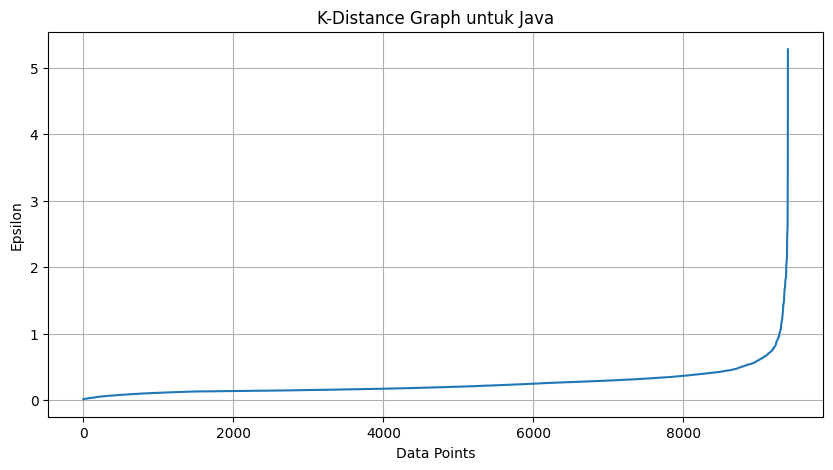

In [13]:
k = 8
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, k-1], axis=0)

plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title(f"K-Distance Graph untuk Java")
plt.xlabel("Data Points")
plt.ylabel("Epsilon")
plt.grid(True)
plt.show()

In [14]:
EPS_PARAM = 0.3
MIN_SAMPLES_PARAM = 5

dbscan = DBSCAN(eps=EPS_PARAM, min_samples=MIN_SAMPLES_PARAM)
clusters = dbscan.fit_predict(X_scaled)

df_cluster['Cluster'] = clusters
df_cluster['Label'] = df_cluster['Cluster'].apply(lambda x: f'Cluster {x}' if x != -1 else 'Noise')

In [30]:
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
persen_noise = (n_noise / len(df_cluster)) * 100

if n_clusters > 0:
    stats = df_cluster[df_cluster['Cluster'] != -1].groupby('Label')[features].mean()
    display(stats)

if n_clusters > 1:
    sil_score = silhouette_score(X_scaled, clusters)
else:
    print("Evaluasi: Silhouette Score tidak dapat dihitung (< 2 cluster).")

,lat,lon,depth,mag
Label,,,,
Cluster 0,-8.274626,109.107206,24.360976,3.426524
Cluster 1,-9.324000,113.848000,67.200000,2.940000
Cluster 10,-6.792000,110.510000,10.800000,3.040000
Cluster 11,-10.407500,109.550000,14.500000,4.075000
Cluster 12,-7.194000,112.362000,10.000000,4.020000
Cluster 13,-9.104000,108.482000,42.000000,4.520000
Cluster 14,-5.858750,110.415000,545.250000,4.262500
Cluster 15,-8.632857,113.638571,87.857143,2.700000
Cluster 16,-8.203333,112.590000,10.000000,3.766667


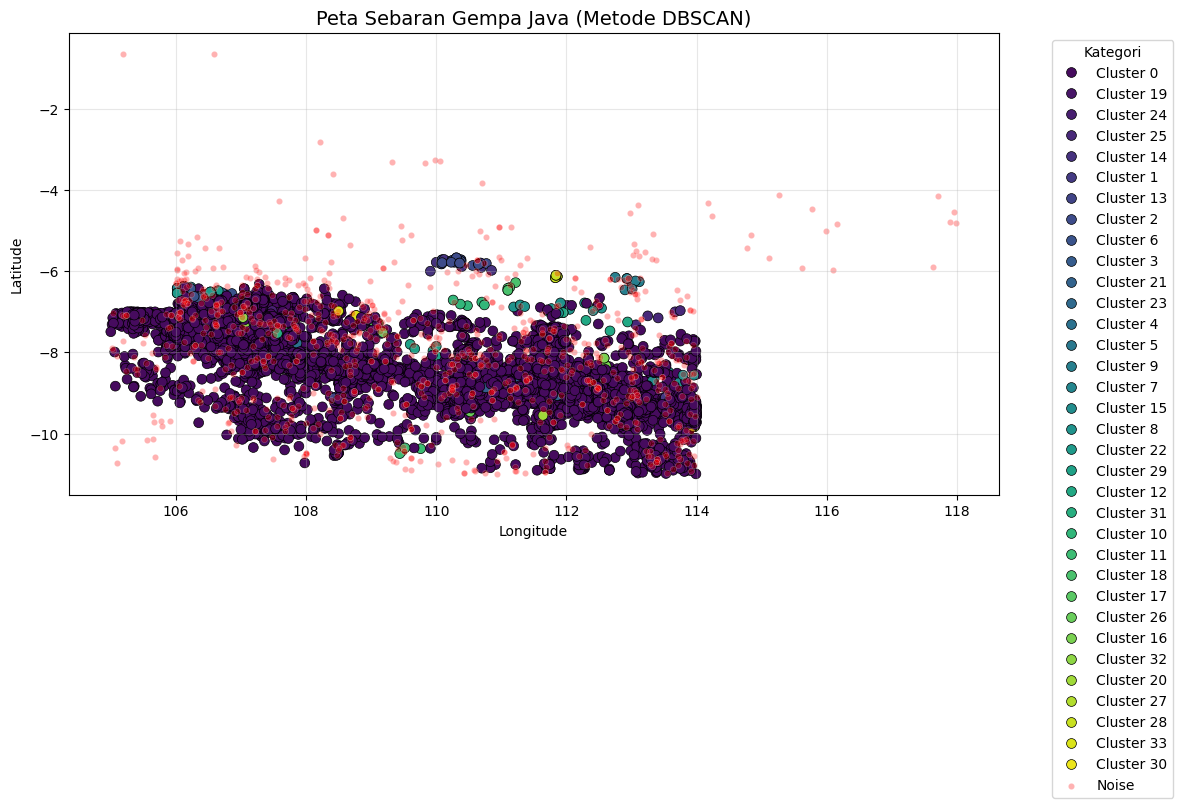

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cluster[df_cluster['Cluster'] != -1], x='lon', y='lat', hue='Label',
                palette='viridis', s=50, edgecolor='k', linewidth=0.5)

sns.scatterplot(data=df_cluster[df_cluster['Cluster'] == -1], x='lon', y='lat',
                color='red', s=20, alpha=0.3, label='Noise')

plt.title(f"Peta Sebaran Gempa {WILAYAH_TARGET} (Metode DBSCAN)", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Kategori")
plt.grid(True, alpha=0.3)
plt.show()

In [19]:
fig = px.scatter_mapbox(
    df_cluster,
    lat="lat", lon="lon",
    color="Label",
    hover_name="Label",
    hover_data=["depth", "mag"],
    color_discrete_sequence=px.colors.qualitative.Bold,
    zoom=5,
    height=600,
    title=f"Visualisasi Zona Gempa Java"
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [20]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

if n_clusters > 1:
    sil_score = silhouette_score(X_scaled, clusters)
    dbi_score = davies_bouldin_score(X_scaled, clusters)
    chi_score = calinski_harabasz_score(X_scaled, clusters)
    print(f"1. Silhouette Score       : {sil_score:.4f} (Mendekati 1 = Baik)")
    print(f"2. Davies-Bouldin Index   : {dbi_score:.4f} (Mendekati 0 = Baik)")
    print(f"3. Calinski-Harabasz Index: {chi_score:.4f} (Semakin tinggi = Baik)")
else:
    print("Evaluasi tidak dapat dilakukan karena hanya terbentuk < 2 cluster.")

1. Silhouette Score       : -0.4540 (Mendekati 1 = Baik)
2. Davies-Bouldin Index   : 1.4558 (Mendekati 0 = Baik)
3. Calinski-Harabasz Index: 58.6908 (Semakin tinggi = Baik)


In [24]:
def kualitatif_gempa(row):
    if row['depth'] <= 70:
        kat_depth = "Dangkal"
    elif row['depth'] <= 300:
        kat_depth = "Menengah"
    else:
        kat_depth = "Dalam"

    if row['mag'] < 3:
        kat_mag = "Kecil"
    elif row['mag'] < 5:
        kat_mag = "Sedang"
    else:
        kat_mag = "Besar"

    return f"Zona {kat_depth} - {kat_mag}"

In [25]:
final_clusters = df_cluster[df_cluster['Cluster'] != -1].copy()

In [26]:
profil_cluster = final_clusters.groupby('Label')[['lat', 'lon', 'depth', 'mag']].mean().reset_index()

In [27]:
profil_cluster['Kategori Kualitatif'] = profil_cluster.apply(kualitatif_gempa, axis=1)

In [28]:
display(profil_cluster[['Label', 'depth', 'mag', 'Kategori Kualitatif']].sort_values('depth'))

,Label,depth,mag,Kategori Kualitatif
4,Cluster 12,10.000000,4.020000,Zona Dangkal - Sedang
8,Cluster 16,10.000000,3.766667,Zona Dangkal - Sedang
24,Cluster 30,10.000000,5.066667,Zona Dangkal - Besar
27,Cluster 33,10.000000,3.950000,Zona Dangkal - Sedang
2,Cluster 10,10.800000,3.040000,Zona Dangkal - Sedang
18,Cluster 25,11.400000,2.860000,Zona Dangkal - Kecil
32,Cluster 8,11.545455,2.609091,Zona Dangkal - Kecil
29,Cluster 5,12.800000,5.320000,Zona Dangkal - Besar
10,Cluster 18,13.200000,3.860000,Zona Dangkal - Sedang
3,Cluster 11,14.500000,4.075000,Zona Dangkal - Sedang


/tmp/ipython-input-2457389986.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




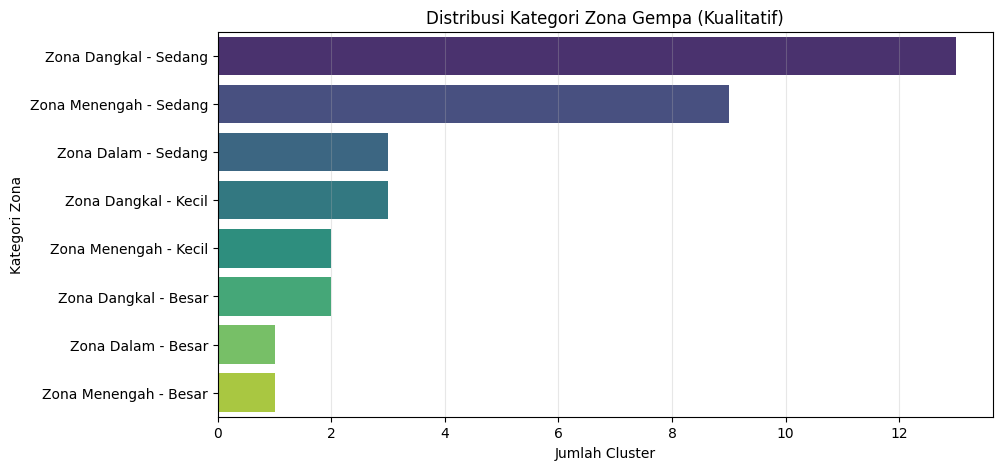

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(y='Kategori Kualitatif', data=profil_cluster, palette='viridis', order=profil_cluster['Kategori Kualitatif'].value_counts().index)
plt.title('Distribusi Kategori Zona Gempa (Kualitatif)')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Kategori Zona')
plt.grid(axis='x', alpha=0.3)
plt.show()